In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from tqdm import tqdm

In [2]:
# 필요한 파일을 불러옵니다
price = pd.read_pickle("Data/allstock_reduced.pickle")
spx_mask = pd.read_pickle("Data/spx_mask.pickle")

rtn = price.pct_change(fill_method=None)

참고를 위한 sample

2021년 1월1일에 이전 1년치 주가를 보고 최소분산 포트폴리오를 구성하는 경우

In [4]:
# 목적함수 Define
def obj_minvariance(weights, cov_matrix):
    return np.dot(weights.T, np.dot(cov_matrix, weights))

In [5]:
# 2020년 12월 31일에(마지막날)에 S&P500지수를 구성하고 있는 종목이 투자대상군이 된다
## 그 투자대상군 주식 리스트를 가져오는 코드 
col = spx_mask.loc["2020-12-31", ~spx_mask.loc["2020-12-31"].isna()].index

In [8]:
# 2021년 1월 1일 이전 1년인 2020년의 수익을 보고 분산-공분산 행렬을 계산한다
rtn_sample = rtn.loc["2020",col]
cov_matrix = rtn_sample.cov()

In [9]:
# 제약조건들을 setting 해준다
constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
bounds = tuple((0,1) for i in range(len(rtn_sample.columns)))
initial_weights = np.ones(len(rtn_sample.columns)) / len(rtn_sample.columns)

In [10]:
# minimize 알고리즘에 집어 넣어준다
result = minimize(obj_minvariance, initial_weights, args=(cov_matrix,),
                  method='SLSQP', constraints=constraints, bounds=bounds)
min_variance_weights = result.x

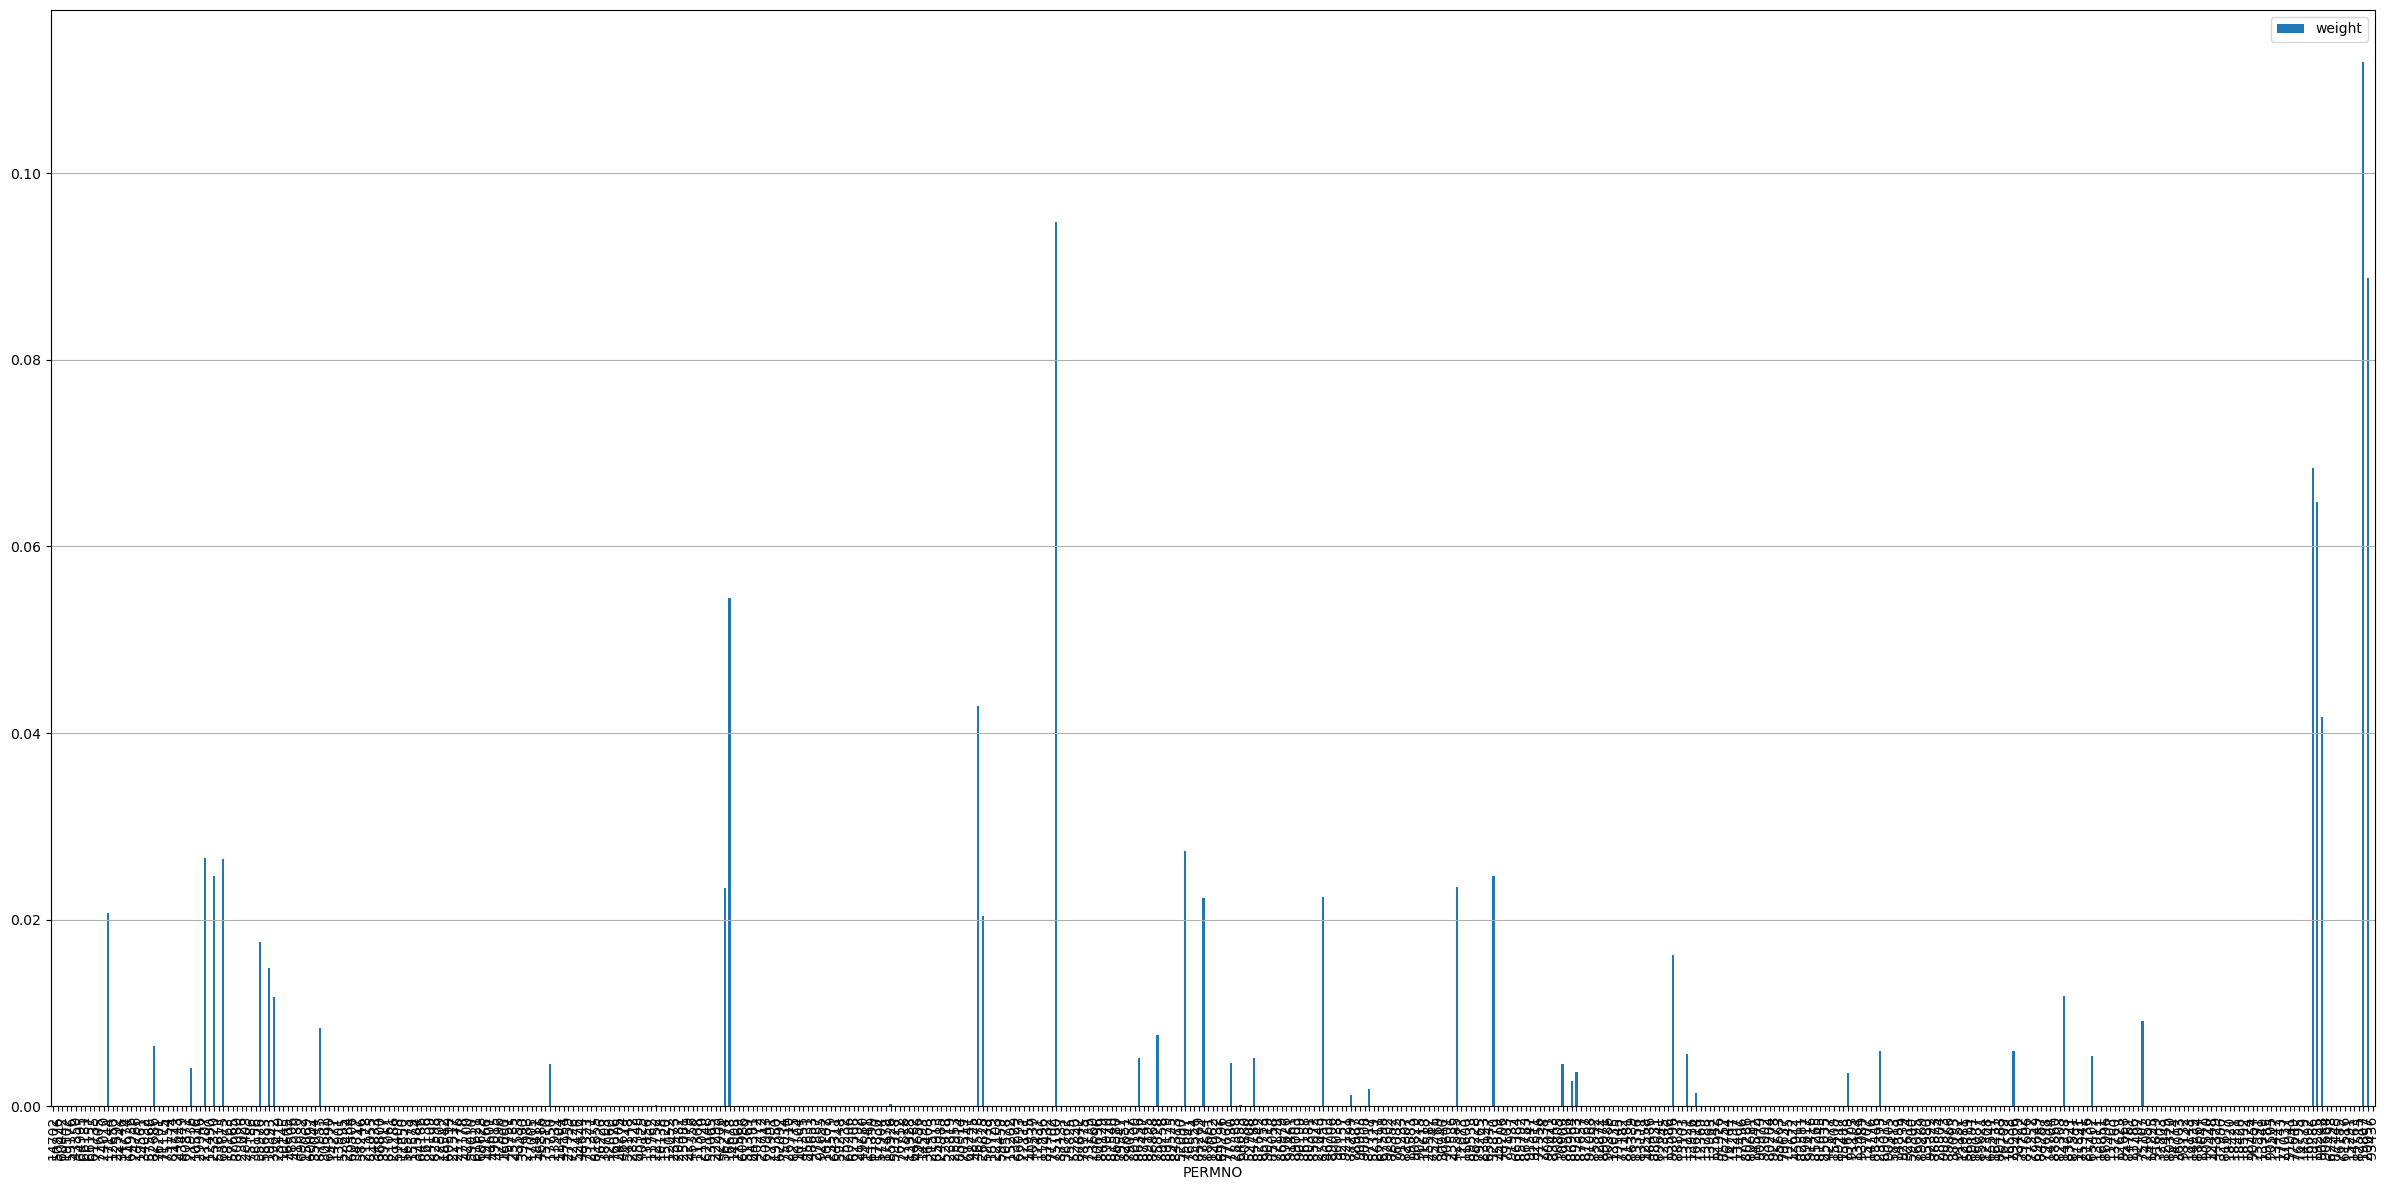

In [19]:
# weight를 시각화 해보자
pd.DataFrame(min_variance_weights, 
             index=rtn_sample.columns, 
             columns=["weight"]).plot(figsize=(24,12), kind="bar")

plt.grid(axis="y")
plt.tight_layout();